# Spotify Analytics
##### You are now running a AWS Glue Studio notebook; To start using your notebook you need to start an AWS Glue Interactive Session.


#### Optional: Run this cell to see available notebook commands ("magics").


In [ ]:
%help

####  Run this cell to set up and start your interactive session.


In [2]:
%idle_timeout 30
%glue_version 5.0
%worker_type G.1X
%number_of_workers 5

#import sys
#from awsglue.transforms import *
#from awsglue.utils import getResolvedOptions
#from pyspark.context import SparkContext
#from awsglue.context import GlueContext
#from awsglue.job import Job
  
#sc = SparkContext.getOrCreate()
#glueContext = GlueContext(sc)
#spark = glueContext.spark_session
#job = Job(glueContext)

You are already connected to a glueetl session 0709bc76-1ade-44e8-bd80-4678bd8f5cec.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Current idle_timeout is 30 minutes.
idle_timeout has been set to 30 minutes.


You are already connected to a glueetl session 0709bc76-1ade-44e8-bd80-4678bd8f5cec.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Setting Glue version to: 5.0


You are already connected to a glueetl session 0709bc76-1ade-44e8-bd80-4678bd8f5cec.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous worker type: G.1X
Setting new worker type to: G.1X


You are already connected to a glueetl session 0709bc76-1ade-44e8-bd80-4678bd8f5cec.

No change will be made to the current session that is set as glueetl. The session configuration change will apply to newly created sessions.


Previous number of workers: 5
Setting new number of workers to: 5



In [3]:
# Importar librerías
import boto3
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

In [11]:
# Configuración
BUCKET_NAME = "spoti-reports-data"
CURATED_PREFIX = "curated/"
REPORT_PREFIX = "reports/"

In [12]:
# Inicializar cliente S3
s3 = boto3.client('s3')

In [13]:
# Obtener el archivo Parquet más reciente
response = s3.list_objects_v2(Bucket=BUCKET_NAME, Prefix=CURATED_PREFIX)
latest_file = max(response.get('Contents', []), key=lambda x: x['LastModified'])
file_key = latest_file['Key']

In [14]:
# Leer el archivo Parquet desde S3
obj = s3.get_object(Bucket=BUCKET_NAME, Key=file_key)
df = pd.read_parquet(BytesIO(obj['Body'].read()))

In [15]:
df

                                            song_name  ...            added_date
0                                            Heathens  ...  2016-09-26T02:35:28Z
1                                                Ride  ...  2016-09-26T02:35:15Z
2                                          Icky Thump  ...  2016-09-26T03:06:18Z
3     Sweet Dreams (Are Made of This) - 2005 Remaster  ...  2016-09-26T03:06:39Z
4                                             Believe  ...  2016-09-26T03:14:35Z
...                                               ...  ...                   ...
1408                                        Backwards  ...  2025-01-20T14:43:03Z
1409                                     Evening Star  ...  2025-01-20T23:43:36Z
1410                           The Little Drummer Boy  ...  2025-01-23T03:21:53Z
1411                                Entre dos tierras  ...  2025-01-26T19:52:13Z
1412                                Island in the Sun  ...  2025-01-27T02:20:34Z

[1413 rows x 4 columns]


In [16]:
# Calcular indicadores
total_songs = len(df)
top_10_songs = df['song_name'].value_counts().head(10)
average_duration = df['duration_min'].mean()
top_artists = df['artist_name'].value_counts().head(10)

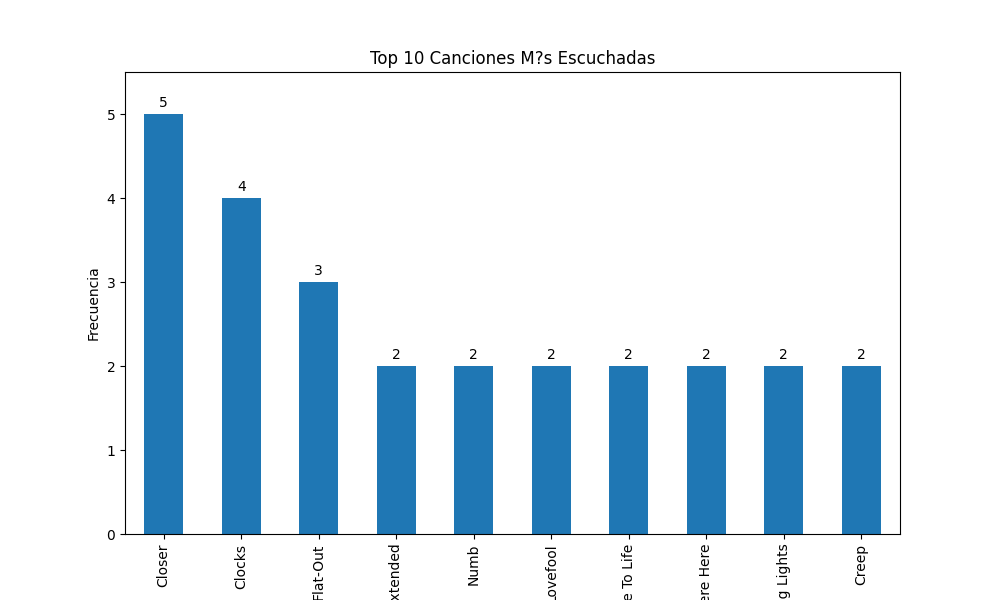

In [17]:
# Generar gráficos y mostrarlos en el Notebook
# Gráfico: Top 10 canciones más escuchadas
plt.figure(figsize=(10, 6))
ax = top_10_songs.plot(kind='bar', title='Top 10 Canciones Más Escuchadas', legend=False)
plt.xlabel('Canciones')
plt.ylabel('Frecuencia')

# Ajustar el eje y al valor máximo del conjunto de datos con un margen adicional
plt.ylim(0, top_10_songs.max() * 1.1)  # Ajustar el límite superior con un margen del 10%

# Agregar etiquetas con los valores actuales de cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Mostrar el gráfico
%matplot plt

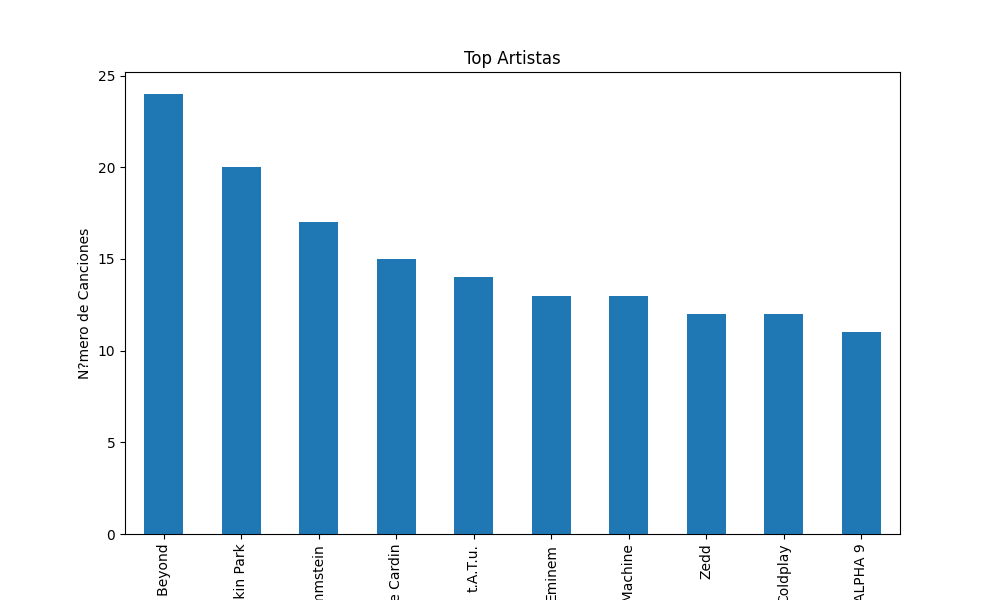

In [18]:
# Gráfico: Top artistas
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar', title='Top Artistas')
plt.xlabel('Artistas')
plt.ylabel('Número de Canciones')

%matplot plt